# DSCI 303 - Project 03
### Michael Bernier

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Part A: Stock Simulation Function
We will create a function to generate simulated runs of stock prices

In [2]:
def simulate_stock(start,rate,vol,days):
    daily_yields = np.random.normal(loc=rate/252,scale=(vol/(252**0.5)),size=days)
    cumulative_yields = np.cumsum(daily_yields)
    daily_multipliers = np.exp(cumulative_yields)
    daily_prices = np.round((daily_multipliers * start),2)
    prices_out = np.concatenate(([start],daily_prices))
    return prices_out
    

Now we will test the function using the following values: starting price 500, rate 8%, volatility 0.3, 60 days

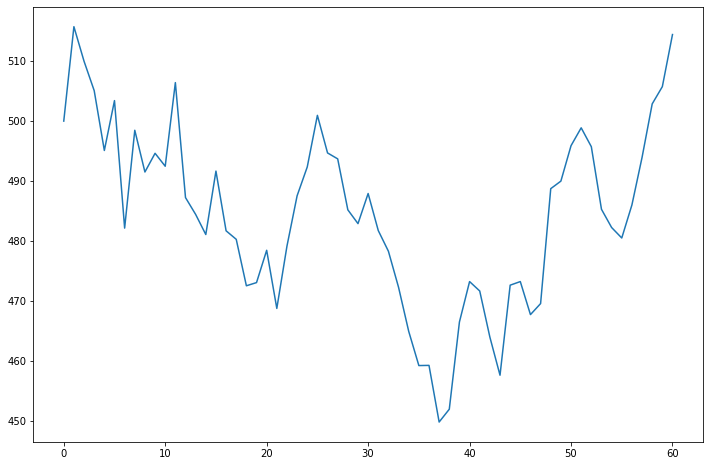

In [3]:
np.random.seed(1)
stock_prices = simulate_stock(500,0.08,0.3,60)

plt.figure(figsize=[12,8])

plt.plot(stock_prices)
plt.show()

## Part B: Annual Yield Function
We will create a function to calculate the annual yield for a stock

In [4]:
def find_yield(run):
    annual_yield = np.round((math.log(run[-1]/run[0]) * (252/(len(run)-1))),4)
    return annual_yield

Now we will test this function with the simulated run from Part A

In [5]:
print(find_yield(stock_prices))

0.1196


Now we will explore potential variability by creating and plotting 25 simulated runs

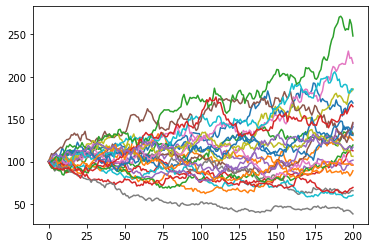

In [6]:
yield_list = []
for i in range(25):
    run = simulate_stock(100,0.06,0.4,200)
    yield_list.append(find_yield(run))
    plt.plot(run)
plt.show()    

We will now print the list of yields for the 25 simulated runs

In [7]:
print(yield_list)

[0.6611, 0.2836, 0.3501, 0.1506, 0.0198, 0.3635, 0.9697, -0.5283, 0.7798, -0.6351, 0.4319, -0.1446, 0.2234, -0.4586, 0.4608, 0.4768, -0.0479, -1.2092, 0.0748, 0.7724, 0.3386, -0.0558, 1.1441, 0.6283, 0.1978]


## Part C: Finding Seeds that Generate Specific Outcomes
We will explore working with random number seeds that will result in specific outcomes

In the cell below, Stock A has the highest simulated final price.

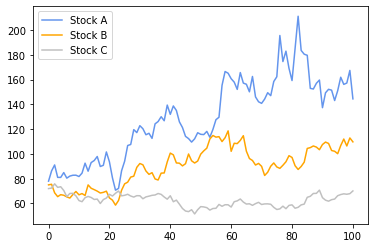

In [8]:
np.random.seed(10)

Stock_A = simulate_stock(78,0.04,1.2,100)
Stock_B = simulate_stock(75,0.08,0.8,100)
Stock_C = simulate_stock(72,0.16,0.6,100)

plt.plot(Stock_A,color='cornflowerblue',label='Stock A')
plt.plot(Stock_B,color='orange',label='Stock B')
plt.plot(Stock_C,color='silver',label='Stock C')
plt.legend()
plt.show()

In the cell below, Stock B has the highest simulated stock price

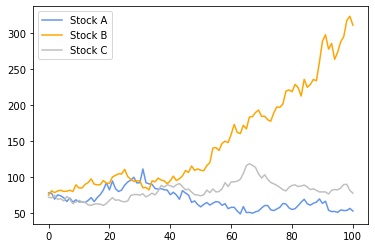

In [9]:
np.random.seed(22)

Stock_A = simulate_stock(78,0.04,1.2,100)
Stock_B = simulate_stock(75,0.08,0.8,100)
Stock_C = simulate_stock(72,0.16,0.6,100)

plt.plot(Stock_A,color='cornflowerblue',label='Stock A')
plt.plot(Stock_B,color='orange',label='Stock B')
plt.plot(Stock_C,color='silver',label='Stock C')
plt.legend()
plt.show()

In the cell below, Stock C has the higest simulated stock price

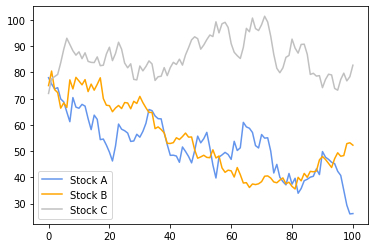

In [10]:
np.random.seed(31)

Stock_A = simulate_stock(78,0.04,1.2,100)
Stock_B = simulate_stock(75,0.08,0.8,100)
Stock_C = simulate_stock(72,0.16,0.6,100)

plt.plot(Stock_A,color='cornflowerblue',label='Stock A')
plt.plot(Stock_B,color='orange',label='Stock B')
plt.plot(Stock_C,color='silver',label='Stock C')
plt.legend()
plt.show()

## Part D: Monte Carlo Simulation
We will create a Monte Carlo simulation to estimate probabilities relating to the outcome of a certain event

In [11]:
def monte_carlo(start,rate,vol,days,num_runs):
    final_prices = []
    annual_yields = []
    for i in range(0,num_runs):
        run = simulate_stock(start,rate,vol,days)
        final_prices.append(run[-1])
        annual_yields.append(find_yield(run))
    final_prices = np.array(final_prices)
    annual_yields = np.array(annual_yields)
    return final_prices,annual_yields   

Now we will test the function using the following parameters: seed 1, current price 200, rate 10%, volatility 0.4, 500 days, 10,000 runs. The final prices will be plotted in a histogram.

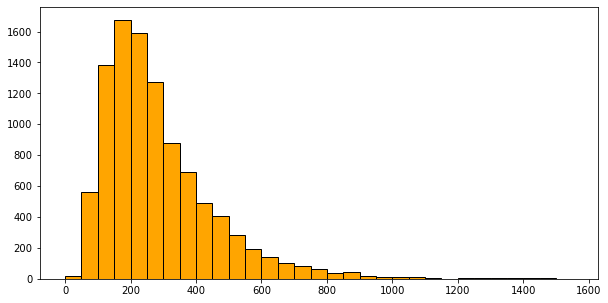

In [12]:
np.random.seed(1)

(prices,yields) = monte_carlo(200,0.10,0.4,500,10000)

plt.figure(figsize=[10,5])
plt.hist(x=prices,bins=np.arange(0,1600,50),color='orange',edgecolor='black')
plt.show()

Now we will display the 10th, 25th, 50th, 75th, and 90th percentiles for the final prices

In [13]:
print('10th percentile:',round(np.percentile(prices,10),2))
print('25th percentile:',round(np.percentile(prices,25),2))
print('50th percentile:',round(np.percentile(prices,50),2))
print('75th percentile:',round(np.percentile(prices,75),2))
print('90th percentile:',round(np.percentile(prices,90),2))

10th percentile: 118.05
25th percentile: 165.57
50th percentile: 242.95
75th percentile: 357.56
90th percentile: 505.91


## Part E: Effects of Volatility
We will explore the effect of volatility on the simulated stock prices

In [14]:
np.random.seed(1)

(prices_A,yields_A) = monte_carlo(100,0.12,0.3,150,10000)
(prices_B,yields_B) = monte_carlo(100,0.12,0.7,150,10000)

print('Average Annual Yield for A over 10000 runs:','{:.4f}'.format(np.sum(yields_A)/10000))
print('Average Annual Yield for B over 10000 runs:','{:.4f}'.format(np.sum(yields_B)/10000))

Average Annual Yield for A over 10000 runs: 0.1218
Average Annual Yield for B over 10000 runs: 0.1128


Now we will visually examine the results by plotting histograms of the final prices

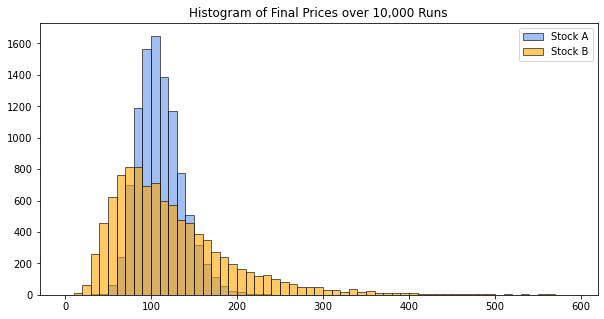

In [15]:
plt.figure(figsize=[10,5])

plt.hist(x=prices_A,edgecolor='black',color='cornflowerblue',bins=np.arange(0,600,10),alpha=0.6,label='Stock A')
plt.hist(x=prices_B,edgecolor='black',color='orange',bins=np.arange(0,600,10),alpha=0.6,label='Stock B')
plt.title('Histogram of Final Prices over 10,000 Runs')
plt.legend()

plt.show()

## Part F: Comparing Two Stocks
We will use a Monte Carlo simulation to compare the performance of two stocks with different parameters

In [16]:
np.random.seed(1)

(prices_A,yields_A) = monte_carlo(120,0.08,0.2,252,10000)
(prices_B,yields_B) = monte_carlo(120,0.05,0.5,252,10000)

a_above_b = 0
a_above_150 = 0
b_above_150 = 0
a_below_100 = 0
b_below_100 = 0

for i in range(0,10000):
    if prices_A[i] > prices_B[i]:
        a_above_b += 1
    if prices_A[i] > 150:
        a_above_150 += 1
    if prices_A[i] < 100:
        a_below_100 += 1
    if prices_B[i] > 150:
        b_above_150 +=1
    if prices_B[i] < 100:
        b_below_100 +=1

print('Proportions of runs in which...')
print('-'*31)
print('A ends above B:  ',round((a_above_b/10000),4))
print('')
print('A ends above 150:',round((a_above_150/10000),4))
print('B ends above 150:',round((b_above_150/10000),4))
print('')
print('A ends below 100:',round((a_below_100/10000),4))
print('B ends below 100:',round((b_below_100/10000),4))

Proportions of runs in which...
-------------------------------
A ends above B:   0.5206

A ends above 150: 0.2338
B ends above 150: 0.3619

A ends below 100: 0.095
B ends below 100: 0.3195


## Part G: Expected Call Payoff
We will use a Monte Carlo simulation to estimate the expected payoff of a call on a particular stock

In [17]:
np.random.seed(1)

(prices,yields) = monte_carlo(200,0.11,0.4,150,10000)

payoff = prices-225
payoff = np.where(payoff < 0, 0, payoff)

print('The average call payoff over 10,000 runs is:',np.sum(payoff)/10000)

The average call payoff over 10,000 runs is: 27.097683
